In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [2]:
#Average number of household/acre
avg_household_per_acre = 10
acres_in_catchment_area = 1800
avg_household = 18000

#Prices of Edukator only caters to the middle-income group
#20% of the population in KL Sentral belongs to the middle income group
mid_income = 0.2*avg_household

#1 in 2 of middle income household have kids
mid_income_kids = 0.5*mid_income

#Average kid per family in Malaysia
average_kid = 2

#50% of middle income household are in primary school and 50% in secondary school
mid_primary = 0.5*mid_income_kids*average_kid
mid_secondary = 0.5*mid_income_kids*average_kid

#There are 10 schools around KL Sentral
school = 10

#70% of schools in KL sentral are primary schools and the balance - secondary schools
primary_school = 0.7*school
secondary_school = school - primary_school

#There are 1 month of holidays annually
month = 12
month_holidays = 1
month_xholidays = month - month_holidays

#There are 2 other competitors (Highflyer , Intelligent) also operating in KL Sentral area
competitors = 2

#2 hours of lessons per subject per week for both primary and secondary school students
lesson_time = 2

#Charges for lesson
chrge_primary = 5
chrge_secondary = 10

#Estimated total core subject in school
subject_primary = 4
subject_secondary = 9

In [3]:
def information():
    data = {'Information':['Average houshold around KL Sentral', 'Average population of middle income group in KL Sentral',
                           'Average middle income household have kids', 'Average kid per family in Malaysia',
                           'Average middle income household kids in primary school','Average middle income household kids in secondary school', 
                           'Total school around KL Sentral','Total primary school around KL Sentral', 
                           'Total secondary school around KL Sentral', 'Total competitors operating in KL Sentral area', 
                           'Lesson time per subject per week (hours)', 'Charge per hour for primary class ($)', 
                           'Charge per hour for secondary class ($)', 'Total core subjects for primary school', 
                           'Total core subjects for secondary school'],
            'Variable':['avg_household', 'mid_income', 'mid_income_kids', 'average_kid','mid_primary', 'mid_secondary', 
                        'school', 'primary_school', 'secondary_school', 'competitors', 'lesson_time', 'chrge_primary', 
                        'chrge_secondary', 'subject_primary', 'subject_secondary'],
            'Value':[avg_household, mid_income, mid_income_kids, average_kid, mid_primary, mid_secondary, school, 
                     primary_school, secondary_school, competitors, lesson_time, chrge_primary, chrge_secondary, 
                     subject_primary, subject_secondary]}
    df = pd.DataFrame(data)
    df['Value'] = df['Value'].astype('int64')
    df = df.style.set_properties(**{'text-align': 'left'})
    df = df.set_table_styles([dict(selector = 'th', props=[('text-align', 'left')])])

    return df

In [4]:
#Assume market share are divided evenly with competitors
#Assume student didnt take class during 1 month holidays
#Estimated revenue if student taking tuition class for all core subjects
weekly_revenue_max = (mid_primary*(subject_primary*chrge_primary*lesson_time)+mid_secondary*(subject_secondary*chrge_secondary*lesson_time))/(competitors+1)
monthly_revenue_max = weekly_revenue_max*4
annual_revenue_max = monthly_revenue_max*month_xholidays


#Estimated revenue if student taking tuition class for half of core subjects
weekly_revenue_half = (mid_primary*((subject_primary/2)*chrge_primary*lesson_time)+mid_secondary*((subject_secondary/2)*chrge_secondary*lesson_time))/(competitors+1)
monthly_revenue_half = weekly_revenue_half*4
annual_revenue_half = monthly_revenue_half*month_xholidays

#Estimated revenue if student taking tuition class no more than 1 of core subjects
weekly_revenue_min = (mid_primary*(1*chrge_primary*lesson_time)+mid_secondary*(1*chrge_secondary*lesson_time))/(competitors+1)
monthly_revenue_min = weekly_revenue_min*4
annual_revenue_min = monthly_revenue_min*month_xholidays

In [5]:
def Estimate():
    print('Assume market share are divided evenly with competitors (Highflyer , Intelligent)',
          '\nAssume student didnt take tuition class during 1 month holidays',
         '\n\033[1m' + 'Core Subject', '\033[0m', '\nPrimary school:', subject_primary, '\nSecondary school:', subject_secondary)
    print('\n\033[1m' + 'Estimated Weekly Revenue', '\033[0m',
             '\nIf student taking tuition class for all core subjects: $%d' %weekly_revenue_max,
             '\nIf student taking tuition class for half of core subjects: $%d' %weekly_revenue_half,
             '\nIf student taking tuition class no more than 1 core subjects: $%d' %weekly_revenue_min)
    print('\033[1m' + 'Estimated Monthly Revenue', '\033[0m',
             '\nIf student taking tuition class for all core subjects: $%d' %monthly_revenue_max,
             '\nIf student taking tuition class for half of core subjects: $%d' %monthly_revenue_half,
             '\nIf student taking tuition class no more than 1 core subjects: $%d' %monthly_revenue_min)
    print('\033[1m' + 'Estimated Annual Revenue', '\033[0m',
             '\nIf student taking tuition class for all core subjects: $%d' %annual_revenue_max,
             '\nIf student taking tuition class for half of core subjects: $%d' %annual_revenue_half,
             '\nIf student taking tuition class no more than 1 core subjects: $%d' %annual_revenue_min)
    return

In [6]:
def visualize():
    data = {'Period':['Weekly', 'Weekly', 'Weekly', 'Monthly', 'Monthly', 'Monthly', 'Annually', 'Annually', 'Annually'],
            'Core Subject Taken':['No more than 1','Half of subjects','All subjects',
                          'No more than 1','Half of subjects','All subjects',
                          'No more than 1','Half of subjects','All subjects'],
            'Revenue':[weekly_revenue_min,weekly_revenue_half,weekly_revenue_max,monthly_revenue_min,monthly_revenue_half, 
                       monthly_revenue_max,annual_revenue_min,annual_revenue_half,annual_revenue_max]}
    df = pd.DataFrame(data)
    sns.catplot(x="Period",
                y="Revenue",
                hue="Core Subject Taken",
                kind="bar",
                data=df)
    plt.ticklabel_format(style='plain', axis='y')
    return

In [7]:
avg_price_per_hour = [8,6,7,8,10,10]
list_mean = statistics.mean(avg_price_per_hour)
list_median = statistics.median(avg_price_per_hour)
list_max = max(avg_price_per_hour)
list_min = min(avg_price_per_hour)
list_std = statistics.stdev(avg_price_per_hour)
list_var = np.var(avg_price_per_hour)

In [8]:
def classrooms():
    df = pd.read_csv('class.csv')
    df.set_index('Day')
    sns.catplot(col="Day", kind="bar", data=df, col_wrap=3, height=6)
    return

In [9]:
#With a discount rate of 4% you can capture 80% of the market
discount_rate = 0.04
market_share = 0.80

#new charge per hour after discount
new_chrge_primary = chrge_primary - 0.04*chrge_primary
new_chrge_secondary = chrge_secondary - 0.04*chrge_secondary

#new annual revenue without competitors (100% market share)
new_annual_min = (mid_primary*(1*new_chrge_primary*lesson_time)+mid_secondary*(1*new_chrge_secondary*lesson_time))*4*11
new_annual_half = (mid_primary*((subject_primary/2)*new_chrge_primary*lesson_time)+mid_secondary*((subject_secondary/2)*new_chrge_secondary*lesson_time))*4*11
new_annual_max = (mid_primary*(subject_primary*new_chrge_primary*lesson_time)+mid_secondary*(subject_secondary*new_chrge_secondary*lesson_time))*4*11

#Annual revenue for Edukator after discount(80% of market share)
Edukator_rev_min = 0.8*new_annual_min
Edukator_rev_half = 0.8*new_annual_half
Edukator_rev_max = 0.8*new_annual_max

In [10]:
def discount():
    print('\033[1m' + 'New charge per hour after discount 4% ($)', '\033[0m',
         '\nPrimary School: %.2f' %new_chrge_primary,
         '\nSecondary School: %.2f' %new_chrge_secondary)
    
    print('\n\033[1m' + 'The Present Revenue Value of Edukator KL Sentral (80 percent market share)', '\033[0m',
     '\nIf student taking tuition class for all core subjects: $%d' %Edukator_rev_max,
     '\nIf student taking tuition class for half of core subjects: $%d' %Edukator_rev_half,
     '\nif student taking tuition class no more than 1 core subjects: $%d' %Edukator_rev_min)
    
    data = {'Core Subject Taken':['No more than 1', 'Half', 'All'],
            'Revenue ($)':[Edukator_rev_min, Edukator_rev_half, Edukator_rev_max]}
    df = pd.DataFrame(data)
    sns.catplot(x="Core Subject Taken",
                y="Revenue ($)",
                kind="bar",
                data=df)
    plt.title("Estimated Annual Revenue After Discount\n (80% market share)")
    plt.ticklabel_format(style='plain', axis='y')
    return

In [11]:
#Assume the investment to build a new tuition centre is $120M
investment = 120000000

#Max annual Revenue from question 3
Edukator_rev_max

#Breakeven time
breakeven_time = investment/Edukator_rev_max

In [12]:
def breakeven():
    print('Investment to build a new tuition centre: $%d' %investment,
          '\nAnnual Revenue of Edukator: $%d \n(Based on answer in question 3)' %Edukator_rev_max,
          '\n\033[1m' + '\nThe breakeven time for this investment based on the annual revenue is %.2f years or approximately %.0f years.' %(breakeven_time,breakeven_time))
    return

## CASE STUDY
#### Situation:
A local tuition center called Edukator provides tuition services within Kajang. They are interested
in expanding their business by setting up a new branch in a new location around KL Sentral.
The objective of this is to increase the total profit of Edukator.
Here are some additional information that you might find useful :

● There are 10 schools around KL Sentral <br>
● 70% of schools in KL sentral are primary schools and the balance - secondary schools <br>
● On average, there are 50% male and 50% female in each school <br>
● There are 1 month of holidays annually <br>
● Prices of Edukator only caters to the middle-income group <br>
● 50% of middle income household are in primary school and 50% in secondary school <br>
● There are 2 other competitors (Highflyer , Intelligent) also operating in KL Sentral area <br>
● 1 in 2 of middle income household have kids <br>
● 2 hours of lessons per subject per week for both primary and secondary school students <br>
● 20% of the population in KL Sentral belongs to the middle income group <br>

## Information

In [13]:
information()

,Information,Variable,Value
0,Average houshold around KL Sentral,avg_household,18000
1,Average population of middle income group in KL Sentral,mid_income,3600
2,Average middle income household have kids,mid_income_kids,1800
3,Average kid per family in Malaysia,average_kid,2
4,Average middle income household kids in primary school,mid_primary,1800
5,Average middle income household kids in secondary school,mid_secondary,1800
6,Total school around KL Sentral,school,10
7,Total primary school around KL Sentral,primary_school,7
8,Total secondary school around KL Sentral,secondary_school,3
9,Total competitors operating in KL Sentral area,competitors,2


## Estimated Revenue

1. What is the estimated revenue Edukator can earn from opening in KL Sentral? <br>
*Assume students only go to the tuition center(s) within their housing area.*

**Formula** <br>
Annual Revenue = [(mid_primary(subject_primary x chrge_primary x lesson_time) + mid_secondary(subject_secondary x chrge_secondary x lesson_time)) x 4 x 11] / (competitors+1)

Assume market share are divided evenly with competitors (Highflyer , Intelligent) 
Assume student didnt take tuition class during 1 month holidays 
Core Subject  
Primary school: 4 
Secondary school: 9

Estimated Weekly Revenue  
If student taking tuition class for all core subjects: $132000 
If student taking tuition class for half of core subjects: $66000 
If student taking tuition class no more than 1 core subjects: $18000
Estimated Monthly Revenue  
If student taking tuition class for all core subjects: $528000 
If student taking tuition class for half of core subjects: $264000 
If student taking tuition class no more than 1 core subjects: $72000
Estimated Annual Revenue  
If student taking tuition class for all core subjects: $5808000 
If student taking tuition class for half of core subjects: $2904000 
If student taking tuition class no more than 1 core subjects: $792000


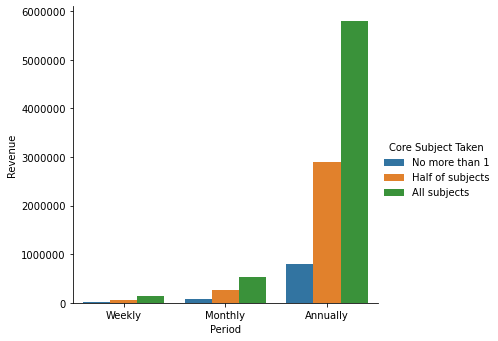

In [14]:
Estimate()
visualize()

## Images Insight

2. Write down your insight(s) for each of the images below.

### Insight - Image 1: Market Share of Edukator

1.	Edukator has the largest market share compared to other tuition services.
2.	Edukator has a 60% market share in terms of number of students.
3.	Educator's total number of lesson hours is also the highest among other tuition services.
4.	Edukator contributed 30% of total hour of lessons.
5.	Potential competitors for Edukator is Excellence, currently is the second highest with 10% of market share and 20% of total hours of lesson.
6.	The number of student and total hours of lesson show a positive correlation.
7.  If Edukator opens a new branch in KL Sentral, it has a high possibility of controlling the market there.

### Insight - Image 2: Price per Lesson in Comparison to Competitors

1.	The average or mean price per hour of all tuition services is \\$8.17 ≈ \\$8.
2.	The min, median and max are \\$6, \\$7.5 and \\$10, respectively.
3.	The mode are \\$8 and \\$10.
4.  The standard deviation and variance are \\$1.60 and \\$2.14, respectively.
5.  Edukator average price per hour is equal to the mean value.
5.	Edukator and Highscore have the same average price per hour of \\$8.
6.	Edukator's average price per hour is neither too high nor too low in comparison to to other tuition services.


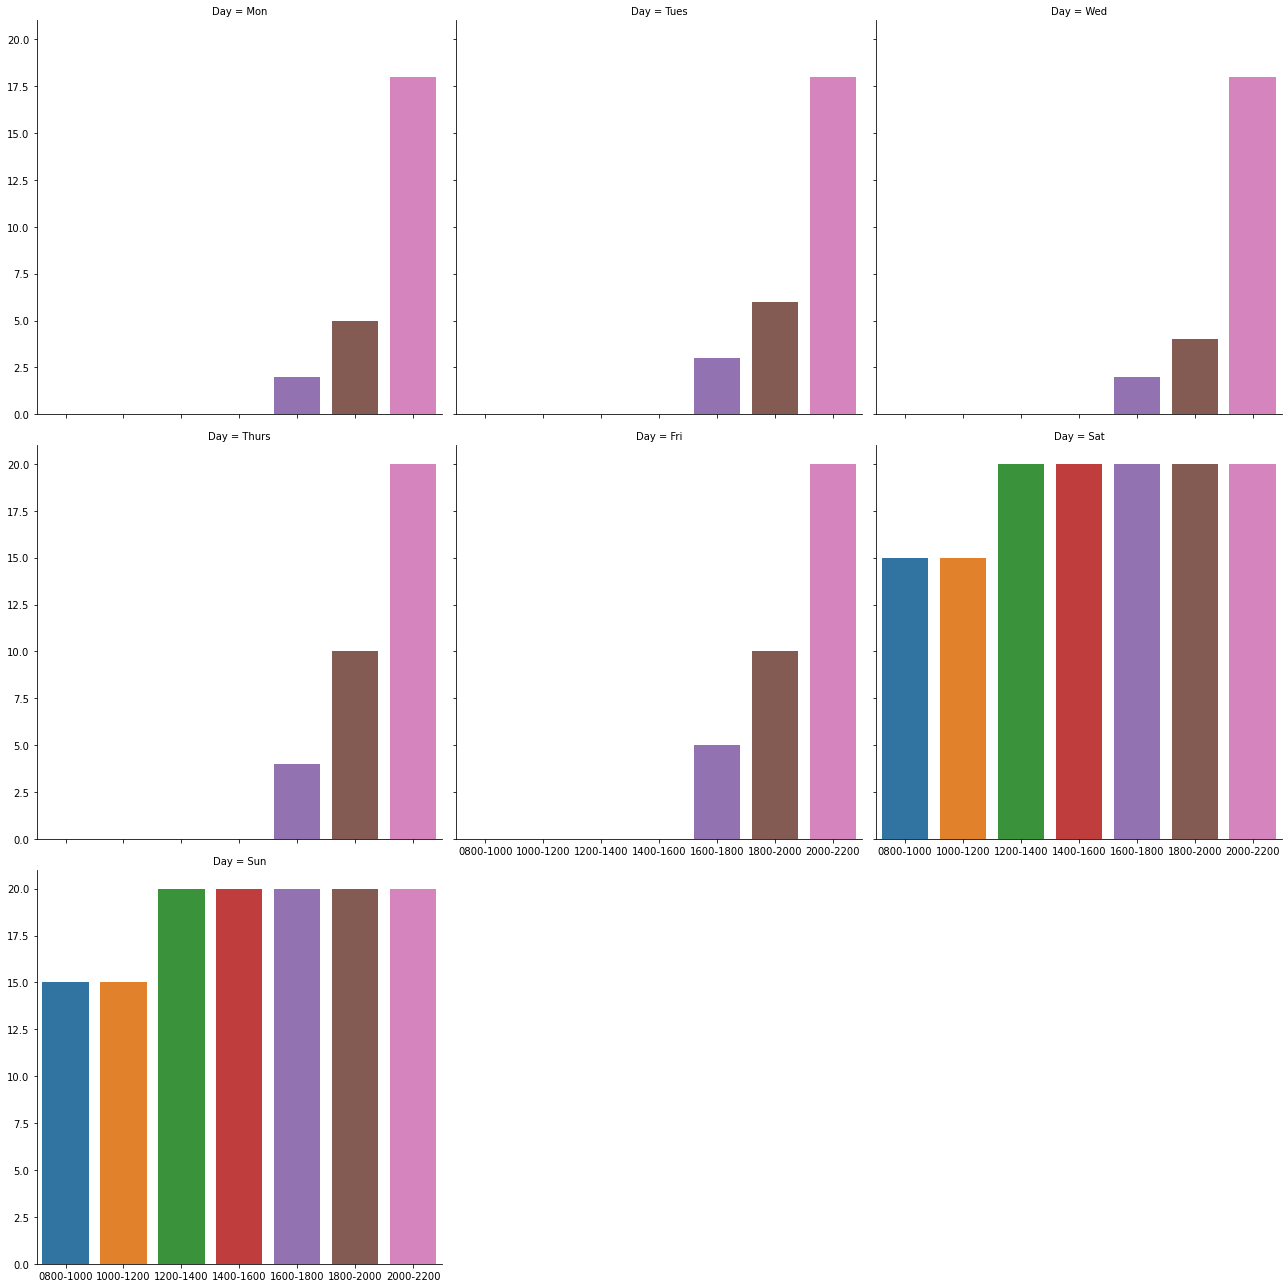

In [15]:
classrooms()

### Insight - Image 3: Classroom Utilization Rate

1.	There are no classrooms filled to 80% capacity from 0800 to 1600 Monday through Friday.
2.	The classrooms are fully utilised on Saturday and Sunday from 1200 to 2200.
3.	Students are less likely to take classes in the morning during weekdays.
4.	Students are more likely to take classes in the night during weekdays especially class 2000-2200.
5.	Students are more likely to take classes during weekend.
6.	The total number of classrooms filled to 80% capacity in one week is 405.
7.  The total number of classrooms filled to 80% capacity in one week is 41% of the total number of classrooms (980).
8.  Weekend classes accounted for 64% of the total number of classrooms filled to  80% capacity in one week.

## Present Value of Edukator After Discount

3. With a discount rate of 4% you can capture 80% of the market. What is the present
value of Edukator KL Sentral?

**Formula** <br>
New charge = chrge_primary - 0.04 x chrge_primary and chrge_secondary - 0.04 x chrge_secondary

Annual Revenue = market_share x [(mid_primary(subject_primary x new_chrge_primary x lesson_time) + mid_secondary(subject_secondary x new_chrge_secondary x lesson_time)) x 4 x 11]

New charge per hour after discount 4% ($)  
Primary School: 4.80 
Secondary School: 9.60

The Present Revenue Value of Edukator KL Sentral (80 percent market share)  
If student taking tuition class for all core subjects: $13381632 
If student taking tuition class for half of core subjects: $6690816 
if student taking tuition class no more than 1 core subjects: $1824768


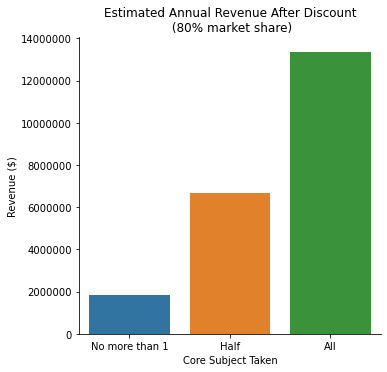

In [16]:
discount()

## Breakeven Time

4. What is the breakeven time for this investment based on the annual revenue?
Assume the investment to build a new tuition centre is $120M.

**Formula** <br>
breakeven time = investment/annual revenue

In [17]:
breakeven()

Investment to build a new tuition centre: $120000000 
Annual Revenue of Edukator: $13381632 
(Based on answer in question 3) 

The breakeven time for this investment based on the annual revenue is 8.97 years or approximately 9 years.


## Explanation

5. Based on your answers from questions 1-4, should Edukator expand into KL
Sentral? *Please elaborate on your answer.*

Based on Edukator's estimated annual revenue from answers 1 and 3, Edukator has a good performance, with a minimum estimated revenue of \\$792000 (33 percent market share and students only taking one core subject) and a maximum estimated revenue of \\$13381632 (80 percent market share and students takes all core subjects). Based on the insights from answer 2, Edukator has the potential to control the market in KL Sentral based on its current market share performance. Edukator's average price per hour per lesson is also neither too high nor too low in comparison to other tutoring services, making it more likely to be chosen by the middle-income group. However, based on the answer to question 4, Edukator's breakeven time after opening a new branch in KL Sentral is approximately 9 years, which is excessively long. Furthermore, the estimated annual revenue is based on the best performance of controlling 80% of the market share and students taking all core subjects. The standard estimation for a business to be profitable or to reach the point at which total revenue equals total costs or expenses is two to three years. It could take up to 5 years at most. A longer breakeven time indicates that a project is at high risk of failure and can lead to debt accumulation over time, eventually causing a company to go out of business. In conclusion, I believe Edukator should not expand into KL Sentral. For me, the best solution is to reduce the investment in building the new tuition centre so that the breakeven time is reduced and thus lower the risk of failure.

## Increase Profitability

6. Aside from expanding their business to a new location, what other ways can
Edukator increase their profitability? *List down your answers in bullet points, no more
than 5 points.*

● Make use of technology by expanding their business to include online tutoring.<br>
● Optimize thier marketing and advertising budget to attract more students.<br>
● Increase student admission and provide better tutoring sessions.<br>
● Provide additional services such as selling merchandise, renting out unused space, and putting up a coffee stand.<br>
● Collaborate with other institutions to reduce costs, improve management, hold events, and expand services.<br>

## Motivation

7. What motivated you to apply to Teleport?
*Please describe it in less than 500 words*

After reading the job description for the teleport graduate programme, I believe this is the best path for me to take after graduation. Based on the description, Teleport or generally AirAsia is a company that prioritizes people and their growth by creating a work environment where opportunities to soar to greater heights and learn is endless. I am passionate about learning and developing my potential. This programme will provide me with hands-on experience working with incredible leaders in a variety of fields. My ideal work environment is one that inspires and motivates their employees. I thrive on having the ability to learn from the experiences of others and I find myself working best when I am able to collaborate with others to achieve a mutual goal. Furthermore, Teleport's day-to-day work tasks are compatible with my skills and knowledge, particularly in data analysis. I believe my previous internship experience in data analysis and project management will be beneficial to me.  I hope to be intellectually challenged by my skills and knowledge in the company. Additionally, experience working in a start-up from a big company like AirAsia is good for my resume. I have also noticed the perks and benefits of joining Teleport, such as flight discounts, medical entitlement and more. Finally, if I am accepted into this programme, I hope to be able to further develop my skills, particularly my communication and leadership skills, as well as gain new knowledge and experience.

## Recently Read Article

8. Tell us about a book or article you recently read and
tell us why you liked it.
*Please describe it in less than 500 words.*

I recently came across an article titled​ "What Does a Data Analyst Do? 2021 Career Guide" from Coursera which piqued my interest. This article is very well written and informative about the career of a data analyst. The article's content is well-organized, beginning with an explanation of what data analysis is, data analyst tasks and responsibilities, how to become a data analyst, and data analyst career advancement. Reading this article has helped me to improve my fundamental knowledge of data analysis and gain a better understanding of the career path that I have chosen. Furthermore, the article provides a list of skills and tools that are typically required to become a data analyst. I can compare the list to my current skills and tool knowledge, as well as use it to help me target new skills and tools to learn. Knowing that most of my current skills and tool knowledge correspond to most of the skills and tools mentioned in the article motivates and inspires me more to become a data analyst. For my next step, I intend to take the IBM Data Analyst Professional Certificate course. Last but not least, what I like best about this article is that it includes an internal link to another article for further reading, which allows me to learn more about the topics discussed.